In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Importing the dataset
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Dividing dataset into training and test sets. Training set used to train model. Test set used to test the performance of the neural net.

Test set is a way to verify that the model works on examples that it hasn't been trained on/hasn;t seen during training.

Ideally, need as much training data as possible. But if we don't structure the neural network with enough neurons, it won't be able to classify/make predictions, even with a large dataset. It will said to be underft.

In [0]:
# Data Preprocessing

`numpy` is used to manipulate and store multidimensional arrays in Python.

In [0]:
# Defining class labels as a list that will let us understand class labels in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
class_names[0]

'T-shirt/top'

In [0]:
class_names[3]

'Dress'

In [0]:
# Exploring the data
train_images.shape

(60000, 28, 28)

In [0]:
# 60000 examples of 28 x 28 pixel images

In [0]:
# Built-in Python function that shows all the attributes and functions for a 
# Python object.
dir(train_images)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [0]:
# Number of examples in the training set
len(train_images)

60000

In [0]:
# Data Preprocessing

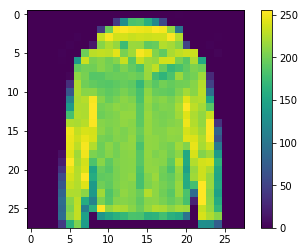

In [0]:
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(False)
plt.show()

## Normalization
If we consider blood cell counts, RBC and WBC counts are much smaller than platelet count in the same sample.

Need to scale down all values to a range between [0, 1] or between '[-1, 1].

This is called normalization - divide each feature by its range.

Divide by range, subtract mean value. This centers all features on the origin and minimises the spread of the feature values.

Dividing by variance?

In [0]:
# Normalizing values. No subtraction of mean because we're assuming it's already
# centered. The 255.0 is the variance of the dataset.
# Is 255 really the variance tho???

train_images = train_images / 255.0

test_images = test_images / 255.0

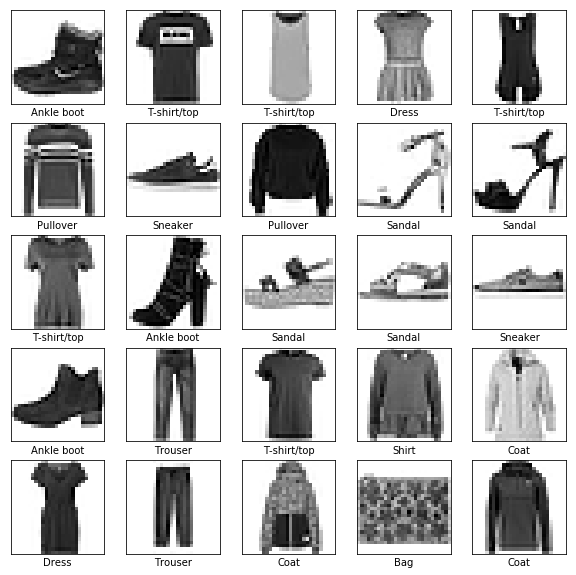

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Model Training

There is no concrete rule that specifies how to choose a specific neural network topology/architecture for a given problem.

This is based on trial-and-error and the experience accrued in this process.

First, we `flatten` the 28 x 28 pixel into a single dimensional vector of 784 pixel values where each pixel carries separate information values.

  Each pixel will be considered a separate piece of information and acts as a separate piece of information to the neural network.
  
  The neural network consists of layers of neurons. Each vertical stack of neurons in the neural network is called a **layer**.
  
 - **Input** - 784 neurons, one for each input.
 - **Output** - should have as many output neurons as the number of labels/classes in our dataset.
 - **Hidden layers** - Can have multiple layers within the neural network/between the input and output layers. Selection of the number of hidden layers depends on experience. Also have to decide the number of neurons in each layer - this, too, comes from experience. Doesn't have to be the same for all layers.

- **Wide and Deep** - number of layers represent the depth of the neural network. The number of neurons determines the **width** of the network.

Each layer will try to keep/maximise necessary features of the day and discard those features that are irrelevant to the actual classification/prediction task.

E.g. if facial recognition depends primary on eyes and nose shape, then the neural network's layer will amplify/select those features that have more to do with eyes and nose shape and will suppress/discard any features that have to do with other features (lips/forehead/hair etc). 

We don't need to specify which features are relevant/irrelevant. This is the advantage of deep learning: we don't need to extract/engineer features for a given task.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),       # layer 1 
    keras.layers.Dense(128, activation=tf.nn.relu),   # layer 2
    keras.layers.Dense(10, activation=tf.nn.softmax)  # layer 3 
])

Instructions for updating:
Colocations handled automatically by placer.


`layer.Flatten()` transforms the 28 x 28 pixel into a single vector. We're telling the model to expect input in the form of 28 x 28 pixels. 

The first `Dense` layer contains 128 vertically stacked nodes. There are many activation functions such as `ReLU`, `tanh`, and `sigmoid`. We'll test all of these to find out which one is better for making predictions. Not all functions are equally suitable for a particular application. 

For this particular application, we have to see the set of available functions and their functionality and then choose one that works best for our given requirements.

`Dense` means that each neuron in each layer is connected to each neuron in every other 

`softmax` is a activation function that works best for classification.

`Sequential` means every layer that we 3 add in the argument will be added to the total neural network layers in the sequence specified. 

Number of neurons and number of layers as well as activation functions are called **hyperparameters**.

# Compiling the Model

Initializes the model that we defined in the previous cells.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

 `optimizer` is the function or procedure that is used to adjust weights and biases for each node in the neural network.
 
 `loss` is a function that defines how we will assess the performance of the model or its accuracy.

In [0]:
# We define the data that we will use to define final parameters for 
# the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2811 - acc: 0.8947
Epoch 2/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2673 - acc: 0.8998
Epoch 3/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2555 - acc: 0.9048
Epoch 4/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2477 - acc: 0.9071
Epoch 5/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2389 - acc: 0.9108


`train_images` defines the data we will feed into the neural network to train it.

`train_labels` are the actual outputs that the loss function will use to assess accuracy.

`epochs` defines how many iterations or cycles we will run to train the model.

# Evaluating Model Accuracy

The accuracy reported in the earlier cell was for the **training data**. Accuracy on training data is always higher than that of the test data. 

We'll now use the same model to evaluate performance on the **test data**. 

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3508 - acc: 0.8736
Test accuracy: 0.8736


In [0]:
# Testing model performance on a single example
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([2.35554438e-07, 1.71363601e-09, 4.60150629e-09, 1.50497462e-10,
       1.19581625e-08, 5.36475680e-04, 2.75825244e-07, 1.22492891e-02,
       1.17150286e-07, 9.87213612e-01], dtype=float32)

In [0]:
print(np.argmax(predictions[0]))

9


In [0]:
print(class_names[9])

Ankle boot


In [0]:
print(class_names[np.argmax(predictions[2])])

Trouser


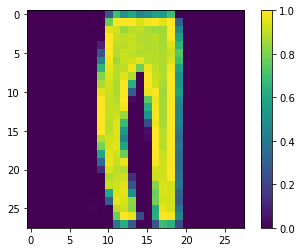

In [0]:
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()